In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [4]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [238]:
gdp_df.shape
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
vf                float64
dtype: object

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [8]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita', 'vf']

In [9]:
gdp_df.drop = ['vf']

In [10]:
gdp_df.head

<bound method NDFrame.head of           Country  Year  GDP_Per_Capita  vf
0     Afghanistan  2021     1517.016266 NaN
1     Afghanistan  2020     1968.341002 NaN
2     Afghanistan  2019     2079.921861 NaN
3     Afghanistan  2018     2060.698973 NaN
4     Afghanistan  2017     2096.093111 NaN
...           ...   ...             ...  ..
7657     Zimbabwe  1994     2670.106615 NaN
7658     Zimbabwe  1993     2458.783255 NaN
7659     Zimbabwe  1992     2468.278257 NaN
7660     Zimbabwe  1991     2781.787843 NaN
7661     Zimbabwe  1990     2704.757299 NaN

[7662 rows x 4 columns]>

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [240]:
gdp_df['Year'].nunique()

33

In [250]:
gdp_df_year_counts = gdp_df.groupby(['Country']).count().sort_values(['Year'])
gdp_df_year_counts

,Year,GDP_Per_Capita,vf
Country,,,
Djibouti,10,10,0
Somalia,10,10,0
Turks and Caicos Islands,12,12,0
Sint Maarten (Dutch part),14,14,0
Kosovo,15,15,0
...,...,...,...
Jamaica,33,33,0
Japan,33,33,0
Jordan,33,33,0


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

(array([5.124e+03, 1.053e+03, 8.830e+02, 3.490e+02, 1.270e+02, 6.100e+01,
        3.500e+01, 2.500e+01, 2.000e+00, 3.000e+00]),
 array([   436.37641563,  16152.98702866,  31869.59764169,  47586.20825471,
         63302.81886774,  79019.42948077,  94736.04009379, 110452.65070682,
        126169.26131985, 141885.87193287, 157602.4825459 ]),
 <BarContainer object of 10 artists>)

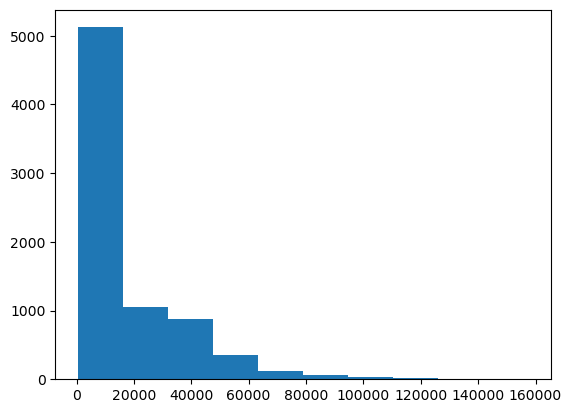

In [14]:
# histogram
plt.hist(gdp_df.GDP_Per_Capita)

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

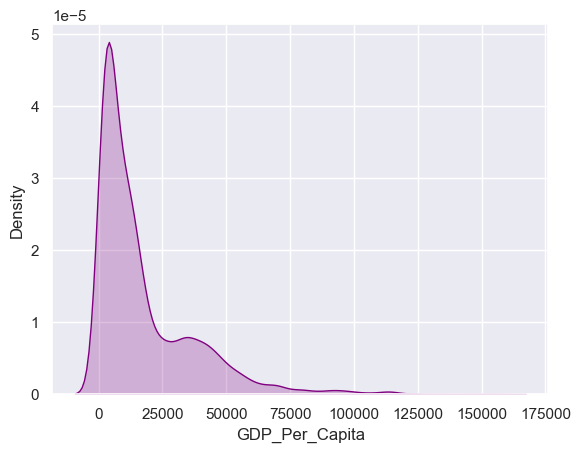

In [254]:
# density plot is easiest in seaborn
sns.kdeplot(gdp_df['GDP_Per_Capita'], fill=True, color='purple')

<Axes: ylabel='GDP_Per_Capita'>

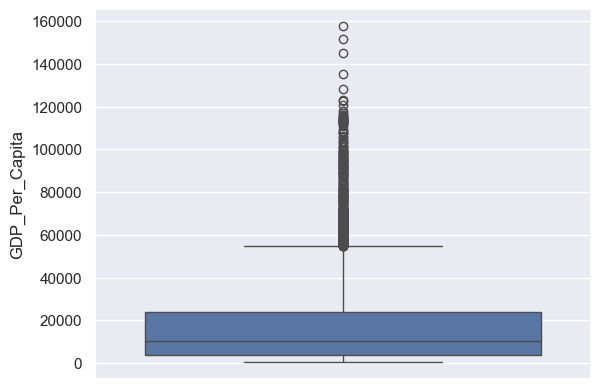

In [256]:
# box plot
sns.boxplot(y=gdp_df['GDP_Per_Capita'])

<Axes: ylabel='GDP_Per_Capita'>

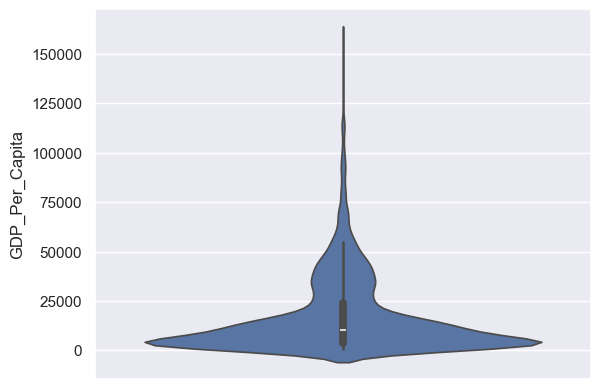

In [258]:
#violin plot
sns.violinplot(gdp_df['GDP_Per_Capita'])

9. What was the median GDP per capita value in 2020?

In [19]:
gdp2020 = gdp_df[gdp_df['Year']==2020]

In [20]:
medgdp2020 = gdp2020['GDP_Per_Capita']

In [21]:
print(np.median(medgdp2020))

13357.997573370474


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  

In [23]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]


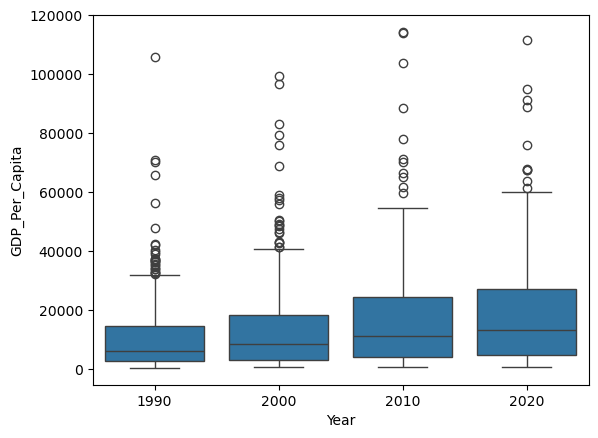

In [24]:
sns.boxplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])
plt.show()

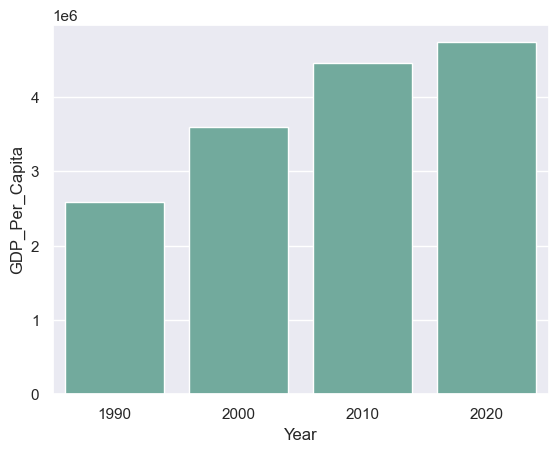

In [25]:
sns.set_theme(style="darkgrid")
sns.barplot(x="Year",
            y="GDP_Per_Capita",
            data=gdp_decades,
            estimator=sum,
            errorbar=None,
            color='#69b3a2');

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

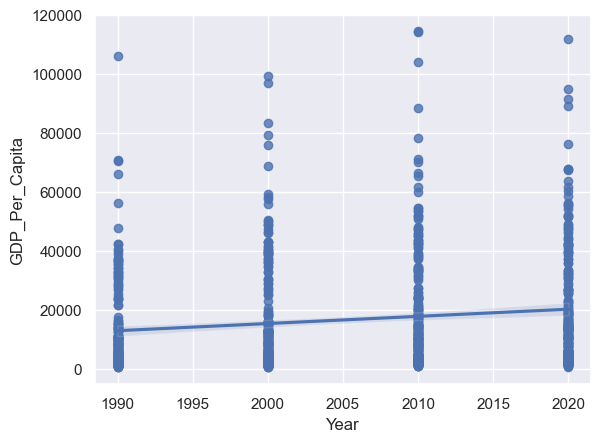

In [26]:
sns.regplot(x=gdp_decades["Year"],y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

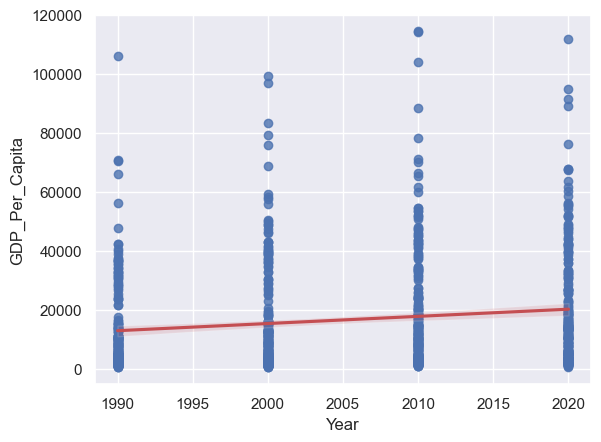

In [27]:
sns.regplot(x=gdp_decades["Year"],
            y=gdp_decades["GDP_Per_Capita"],
            line_kws={"color": "r"})

11. Which country was the first to have a GDP per capita greater than $100,000?

In [29]:
gdp_greater=gdp_df[gdp_df['GDP_Per_Capita']>=100000].sort_values('Year')

In [30]:
gdp_greater.head(1)

,Country,Year,GDP_Per_Capita,vf
7302,United Arab Emirates,1990,105893.626059,NaN


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [32]:
gdp_df2020=gdp_df[gdp_df['Year']==2020].sort_values('GDP_Per_Capita', ascending=False)
gdp_df2020.head(1)

,Country,Year,GDP_Per_Capita,vf
4148,Luxembourg,2020,111751.314751,NaN


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

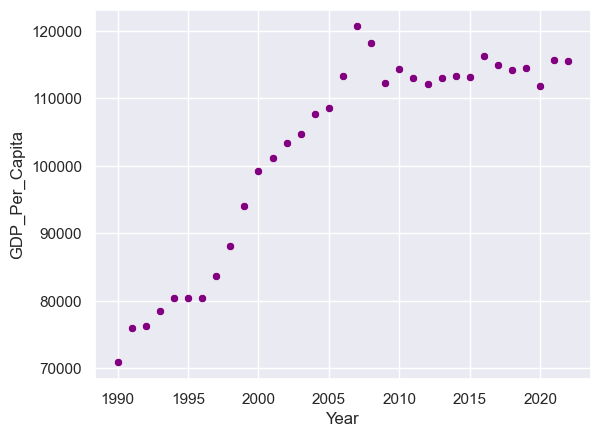

In [33]:
gdp_lux=gdp_df[gdp_df['Country']=='Luxembourg'].sort_values('GDP_Per_Capita')

sns.scatterplot(
    data=gdp_lux,
    x='Year',
    y='GDP_Per_Capita',
    color='purple')

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [35]:
gdp_low = gdp_df[gdp_df['Year']==2020].sort_values('GDP_Per_Capita', ascending=True)
gdp_low.head(1)

,Country,Year,GDP_Per_Capita,vf
973,Burundi,2020,711.355263,NaN


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

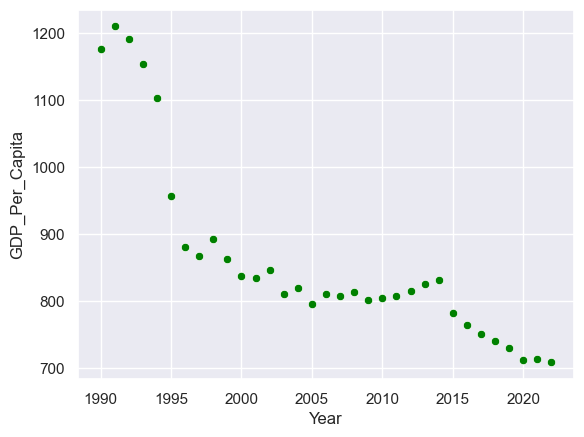

In [36]:
gdp_burundi=gdp_df[gdp_df['Country']=='Burundi'].sort_values('GDP_Per_Capita')

sns.scatterplot(
    data=gdp_burundi,
    x='Year',
    y='GDP_Per_Capita',
    color="green")

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [82]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 6083)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [84]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes     object
dtype: object

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [86]:
internet_df=internet_df.drop(columns=['Value Footnotes'])

In [110]:
internet_df=internet_df.rename(columns={'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})

In [112]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


16. Look at the number of observations in this dataset per year. What do you notice?


In [147]:
internet_years=internet_df.Year.value_counts().to_frame().reset_index()

In [148]:
internet_years.columns = ['Year', 'Country']

In [149]:
internet_years.sort_values(['Year'])

,Year,Country
0,1990,226
32,1991,39
31,1992,50
30,1993,66
29,1994,92
28,1995,141
26,1996,177
21,1997,188
20,1998,195
14,1999,207


17. What is the first year to have a non-zero internet users percentage value? Zimbabwe in 1994

In [158]:
internet_df.loc[internet_df['Internet_Users_Pct']>=0]

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


18. How does the distribution of internet users percent differ for 2000 and 2014?

In [172]:
internet_diff = internet_df.loc[(internet_df['Year']==2000) | (internet_df['Year']==2014)]

In [178]:
internet_diff.sort_values(['Year'])

,Country,Year,Internet_Users_Pct
6075,Zimbabwe,2000,0.401434
2340,Guadeloupe,2000,5.825250
2363,Guam,2000,16.113100
4888,Seychelles,2000,7.395630
2393,Guatemala,2000,0.712333
...,...,...,...
2656,Indonesia,2014,17.143200
2624,India,2014,13.500000
2592,Iceland,2014,98.158000
2772,Israel,2014,75.017800


<Axes: xlabel='Year', ylabel='Count'>

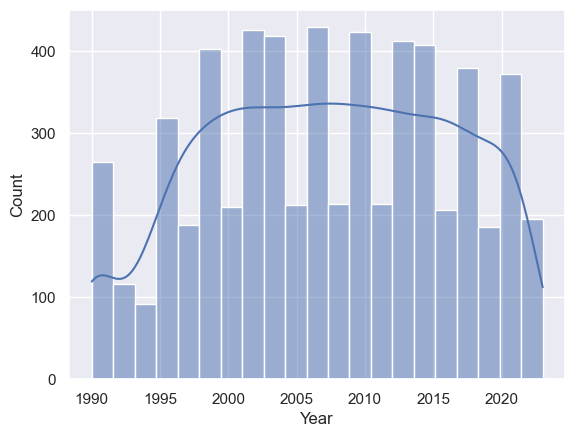

In [192]:
sns.histplot(
    data=internet_df,
    x='Year',
    kde=True)

19. For how many countries was the percentage of internet users below 5% in 2014?

In [208]:
internet_2014= internet_df.loc[(internet_df['Internet_Users_Pct']<5)&(internet_df['Year']==2014)]
print(internet_2014)
internet_2014.count()

                               Country  Year  Internet_Users_Pct
873                            Burundi  2014             1.04239
1033          Central African Republic  2014             2.70000
1061                              Chad  2014             2.90000
1517  Democratic Republic of the Congo  2014             3.00000
1782                           Eritrea  2014             0.99000
2451                     Guinea-Bissau  2014             3.32000
3364                        Madagascar  2014             3.70000
4073                             Niger  2014             1.24868
5055                           Somalia  2014             1.63000
5116                       South Sudan  2014             2.60000


Country               10
Year                  10
Internet_Users_Pct    10
dtype: int64

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [220]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how='inner', on=['Country', 'Year'])
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,vf,Internet_Users_Pct
0,Afghanistan,2019,2079.921861,NaN,17.600000
1,Afghanistan,2018,2060.698973,NaN,16.800000
2,Afghanistan,2017,2096.093111,NaN,13.500000
3,Afghanistan,2016,2101.422187,NaN,11.000000
4,Afghanistan,2015,2108.714173,NaN,8.260000
...,...,...,...,...,...
4628,Zimbabwe,1997,2896.147308,NaN,0.033080
4629,Zimbabwe,1996,2867.026043,NaN,0.016790
4630,Zimbabwe,1995,2641.378271,NaN,0.007684
4631,Zimbabwe,1994,2670.106615,NaN,0.001739


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?


In [230]:
top3_int=gdp_and_internet_use.loc[(gdp_and_internet_use['Year']==2014)]
top3_int.head()

,Country,Year,GDP_Per_Capita,vf,Internet_Users_Pct
5,Afghanistan,2014,2144.449634,NaN,7.0000
26,Albania,2014,11586.817446,NaN,54.3000
55,Algeria,2014,11561.259795,NaN,29.5000
85,Angola,2014,8183.164577,NaN,21.3623
113,Antigua and Barbuda,2014,18779.139077,NaN,67.7800


In [234]:
top3_int.sort_values('Internet_Users_Pct')
top3_int.head(3)

,Country,Year,GDP_Per_Capita,vf,Internet_Users_Pct
5,Afghanistan,2014,2144.449634,NaN,7.0
26,Albania,2014,11586.817446,NaN,54.3
55,Algeria,2014,11561.259795,NaN,29.5


22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.